In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dataset = pd.read_csv("Food_Inspections.csv")
dataset.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2612982,MARIANO'S #8527 UKRANIAN VILLAGE,MARIANO'S #8527 UKRANIAN VILLAGE,2307748.0,Grocery Store,Risk 1 (High),2021 W CHICAGO AVE,CHICAGO,IL,60622.0,02/28/2025,Canvass Re-Inspection,Pass,NaN,41.895785,-87.677931,POINT (-87.67793089259229 41.89578522959797)
1,2612987,BRIOCHE DOREE T-1,BRIOCHE DOREE (T1-C20),34243.0,Restaurant,Risk 2 (Medium),11601 W TOUHY AVE,CHICAGO,IL,60666.0,02/28/2025,Canvass,Pass,36. THERMOMETERS PROVIDED & ACCURATE - Comment...,42.008751,-87.906874,POINT (-87.90687413400109 42.00875076599798)
2,2612971,ALPS ORIGINAL PANCAKE HOUSE,ALPS PANCAKE HOUSE,2961543.0,Restaurant,Risk 1 (High),3637 W IRVING PARK RD,CHICAGO,IL,60618.0,02/28/2025,Canvass,Pass,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - ...",41.953625,-87.719311,POINT (-87.71931084947838 41.95362464225412)
3,2613006,EL HABANERO INC.,EL HABANERO,2283297.0,Restaurant,Risk 1 (High),3300 W FULLERTON AVE,CHICAGO,IL,60647.0,02/28/2025,Canvass,Out of Business,NaN,41.924786,-87.710825,POINT (-87.71082530032471 41.92478563490711)
4,2612998,TACO CITY LLC,TACO CITY,3015525.0,Restaurant,Risk 1 (High),3300 W FULLERTON AVE,CHICAGO,IL,60647.0,02/28/2025,License,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.924786,-87.710825,POINT (-87.71082530032471 41.92478563490711)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114953 entries, 0 to 114952
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    114953 non-null  int64  
 1   DBA Name         114953 non-null  object 
 2   AKA Name         114695 non-null  object 
 3   License #        114949 non-null  float64
 4   Facility Type    114336 non-null  object 
 5   Risk             114924 non-null  object 
 6   Address          114953 non-null  object 
 7   City             114868 non-null  object 
 8   State            114917 non-null  object 
 9   Zip              114946 non-null  float64
 10  Inspection Date  114953 non-null  object 
 11  Inspection Type  114953 non-null  object 
 12  Results          114953 non-null  object 
 13  Violations       81529 non-null   object 
 14  Latitude         114535 non-null  float64
 15  Longitude        114535 non-null  float64
 16  Location         114535 non-null  obje

Replacing empty space with '_' for better column indexing

In [ ]:
dataset.columns = dataset.columns.str.replace(' ', '_')
dataset.columns

Index(['Inspection_ID', 'DBA_Name', 'AKA_Name', 'License_#', 'Facility_Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection_Date',
       'Inspection_Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

Sum of empty values in each colunms

In [ ]:
dataset.isna().sum()

,0
Inspection_ID,0
DBA_Name,0
AKA_Name,258
License_#,4
Facility_Type,617
Risk,29
Address,0
City,85
State,36
Zip,7


**Data Cleaning** : Droping empty rows and unusefull columns.
1. The "Risk" and "Facility_Type" columns are the most important. Empty rows do not provide any useful information; therefore, we will drop these empty rows.
*Unuseful Columns*
1. 'AKA_Name' is the business public name and have some  redundant values with DBA_Name "Doing Business As".

2. 'License_#' is not usefull.


In [ ]:
# Drop those rows

dataset.dropna(subset=['Facility_Type','Risk'], inplace=True)

dataset.drop(dataset[dataset['Risk'] == 'All'].index,inplace=True)
dataset.drop(dataset[dataset['State'] != 'IL'].index,inplace=True)
dataset.drop(columns=['AKA_Name','License_#'], axis=1, inplace=True)


Risk values for each category

Risk values for each category

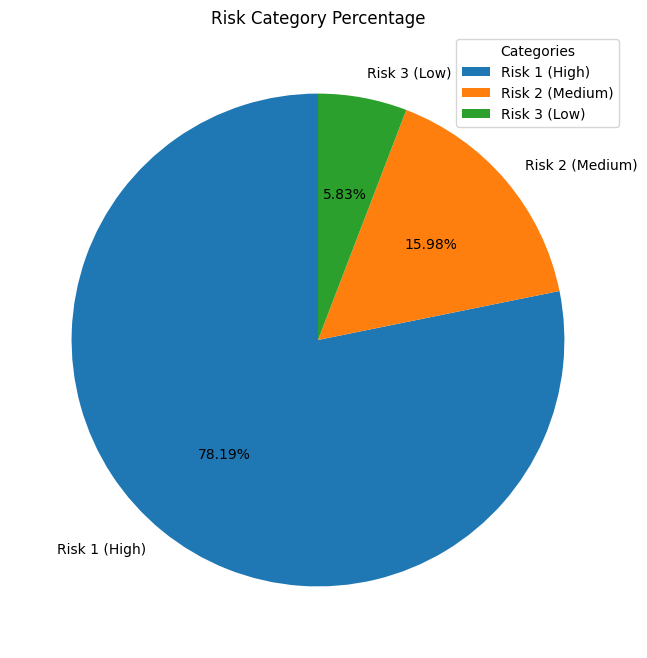

,count
Risk,
Risk 1 (High),89339
Risk 2 (Medium),18257
Risk 3 (Low),6666


In [ ]:
Risk_value_counts = dataset['Risk'].value_counts()


plt.figure(figsize=(8, 8))  # Increase figure size
Risk_value_counts.plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Risk Category Percentage')
plt.ylabel('')  # Hide the y-label
plt.legend(Risk_value_counts.index, title="Categories", loc="best")
plt.show()
dataset['Risk'].value_counts()

,count
Inspection_Type,
Canvass,57505
License,15877
Canvass Re-Inspection,13918
Complaint,11057
Complaint Re-Inspection,4799
License Re-Inspection,4091
Non-Inspection,4081
Short Form Complaint,2432
Recent Inspection,250


Top 10 Inspection Type and Facility_Type

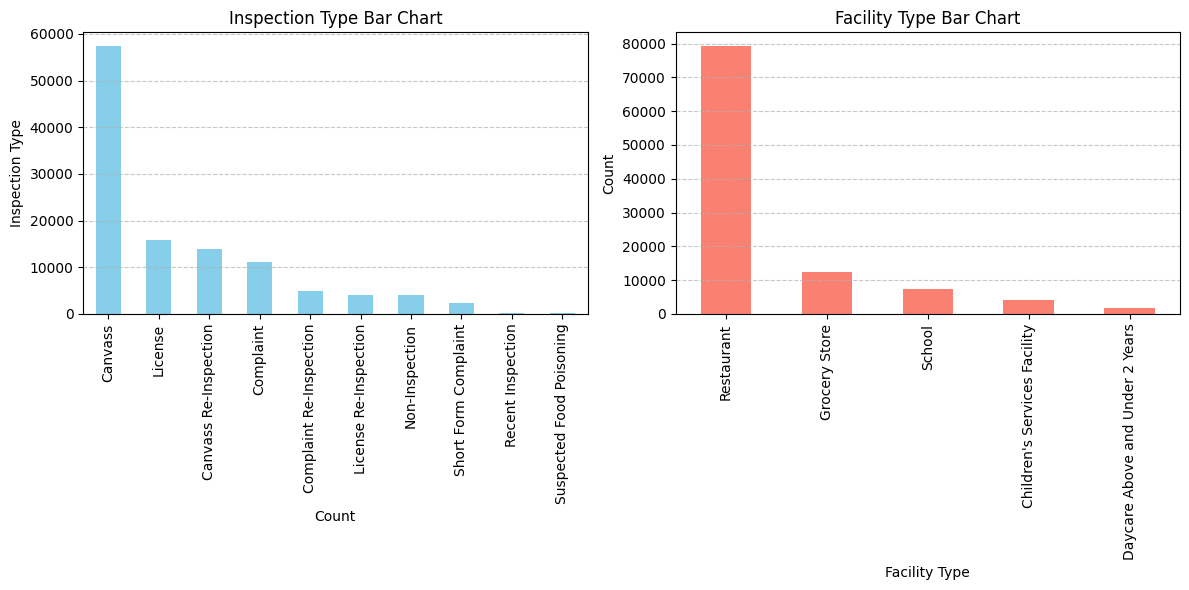

In [ ]:
Inspection_Type_value_counts = dataset['Inspection_Type'].value_counts()[:10]

plt.figure(figsize=(6, 6))  # Increase figure size
Inspection_Type_value_counts.plot(kind='bar', color='skyblue')
plt.title('Inspection Type Bar Chart')
plt.xlabel('Count')
plt.ylabel('Inspection Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
dataset.Inspection_Type.value_counts()



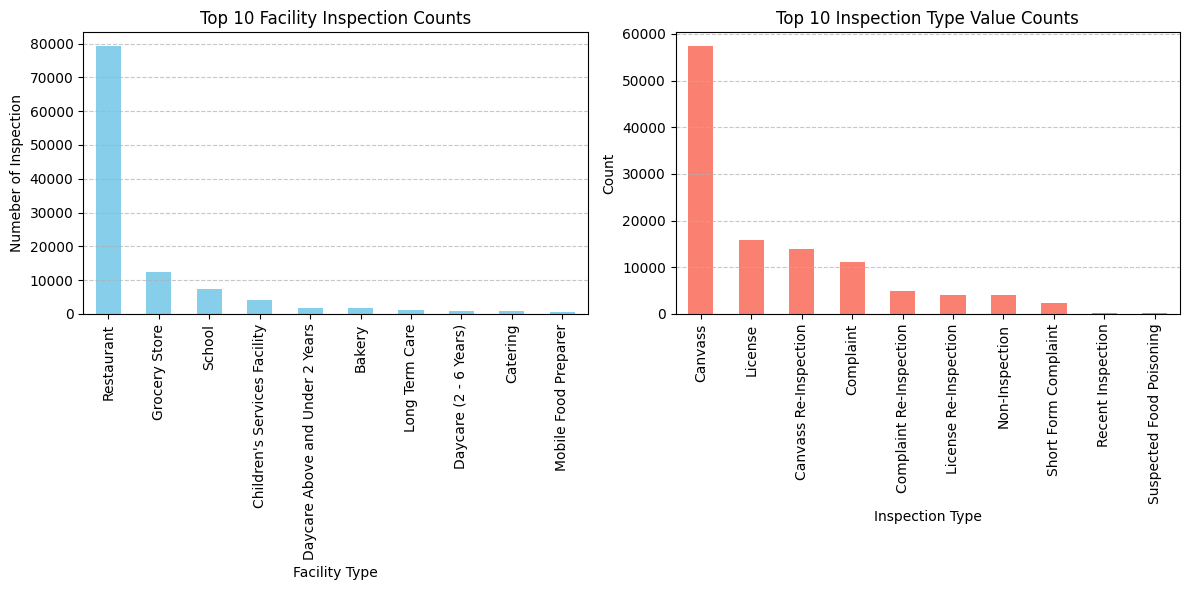

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dataset' is your DataFrame

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Subplot 1: Facility Inspection Counts
facility_inspection_counts = dataset.groupby('Facility_Type')['Inspection_ID'].count()
facility_inspection_counts = facility_inspection_counts.sort_values(ascending=False)
facility_inspection_counts[:10].plot(kind='bar', color='skyblue', ax=axes[0])  # Plot top 10
axes[0].set_title('Top 10 Facility Inspection Counts')
axes[0].set_xlabel('Facility Type')
axes[0].set_ylabel('Numeber of Inspection')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Inspection Type Value Counts
dataset.Inspection_Type.value_counts()[:10].plot(kind='bar', color='salmon', ax=axes[1])  # Plot top 10
axes[1].set_title('Top 10 Inspection Type Value Counts')
axes[1].set_xlabel('Inspection Type')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()  # Prevents overlapping elements
plt.show()


The number of inspections conducted for each type of facility

In [ ]:
facility_inspection_counts = dataset.groupby('Facility_Type')['Inspection_ID'].count()

facility_inspection_counts = facility_inspection_counts.sort_values(ascending=False)
facility_inspection_counts[:10]

,Inspection_ID
Facility_Type,
Restaurant,79375
Grocery Store,12466
School,7248
Children's Services Facility,3981
Daycare Above and Under 2 Years,1809
Bakery,1632
Long Term Care,1073
Daycare (2 - 6 Years),902
Catering,763


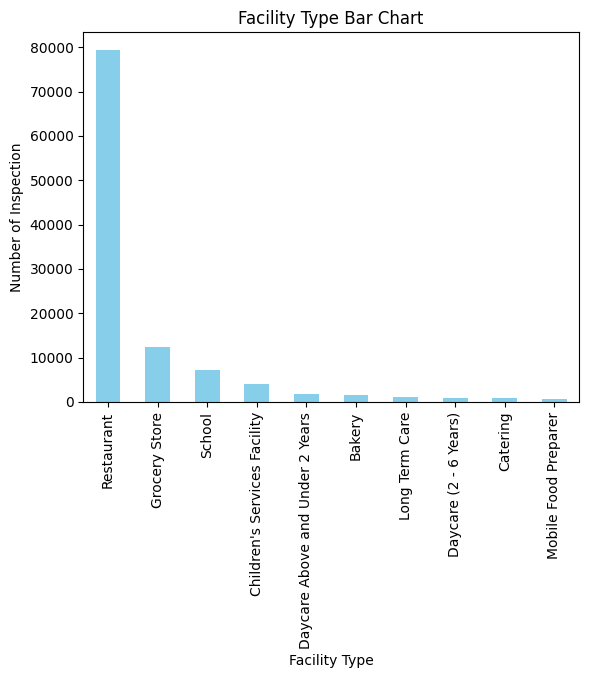

In [ ]:
# Bar chart for Facility Type
facility_inspection_counts
facility_inspection_counts[:10].plot(kind='bar', color='skyblue')
plt.title('Facility Type Bar Chart')
plt.xlabel('Facility Type')
plt.ylabel('Number of Inspection')
plt.show()

In [ ]:
average_risk_by_facility = dataset.groupby('Facility_Type')['Risk'].mean()
average_risk_by_facility

TypeError: agg function failed [how->mean,dtype->object]

How many inspections resulted in each outcome for each facility type.

In [ ]:
results_by_facility = dataset.groupby(['Facility_Type', 'Results']).size().unstack(fill_value=0)[:10]
results_by_facility

Results,Business Not Located,Fail,No Entry,Not Ready,Out of Business,Pass,Pass w/ Conditions
Facility_Type,,,,,,,
(REHAB CENTER),0,0,0,1,0,1,0
1023 CHILDERN'S SERVICES FACILITY,0,4,0,0,1,4,6
1023 CHILDREN'S SERVICES FACILITY,0,0,0,0,1,1,1
1023-CHILDREN'S SERVICES FACILITY,0,1,0,0,1,5,1
1475 LIQUOR,0,1,0,0,0,1,0
15 monts to 5 years old,0,1,0,0,1,1,1
A-Not-For-Profit Chef Training Program,0,2,0,0,0,5,1
ADULT DAY SERVICE,0,1,0,1,0,1,0
ADULT DAYCARE,0,1,0,0,1,13,1


How many violations are associated with each risk level.

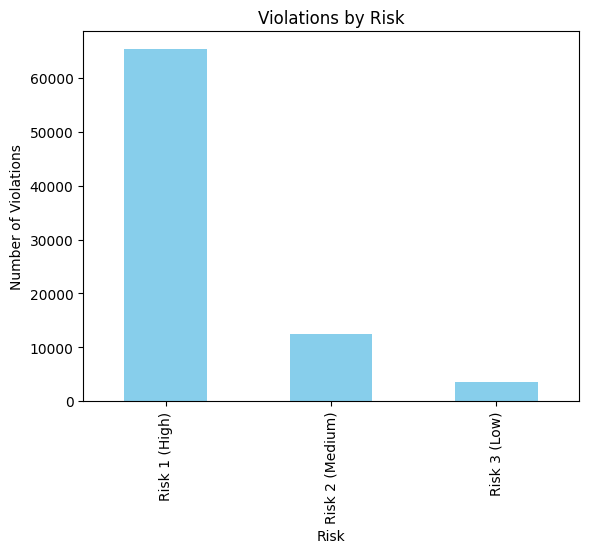

,Violations
Risk,
Risk 1 (High),65385
Risk 2 (Medium),12470
Risk 3 (Low),3583


In [ ]:
violations_by_risk = dataset.groupby('Risk')['Violations'].count()
violations_by_risk.plot(kind='bar', color='skyblue')
plt.title('Violations by Risk')
plt.xlabel('Risk')
plt.ylabel('Number of Violations')
plt.show()
violations_by_risk


 How many inspections occurred each year.

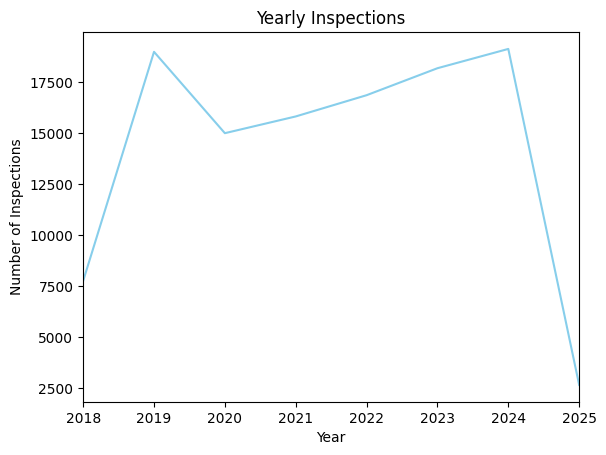

,Violations
Inspection_Date,
2018,7754
2019,18971
2020,14988
2021,15807
2022,16847
2023,18168
2024,19113
2025,2663


In [ ]:
# Ensure Inspection_Date is in datetime format
dataset['Inspection_Date'] = pd.to_datetime(dataset['Inspection_Date'])
monthly_inspections = dataset.groupby(dataset['Inspection_Date'].dt.to_period('Y'))['Violations'].size()

monthly_inspections.plot(kind='line', color='skyblue')
plt.title('Yearly Inspections')
plt.xlabel('Year')
plt.ylabel('Number of Inspections')
plt.show()


monthly_inspections

In [ ]:
inspections_by_city = dataset.groupby('State')['Inspection_ID'].size()
inspections_by_city.sort_values(ascending=False)[:20]

,Inspection_ID
State,
IL,114262
IN,9
CA,2
CO,1
WI,1


In [ ]:
results_by_state = dataset.groupby(['State', 'Results']).size().unstack(fill_value=0)
results_by_state

Results,Business Not Located,Fail,No Entry,Not Ready,Out of Business,Pass,Pass w/ Conditions
State,,,,,,,
CA,0,0,0,0,0,1,1
CO,0,0,0,0,1,0,0
IL,24,22307,6957,2414,8598,47110,26852
IN,0,3,0,0,0,6,0
WI,0,0,0,0,0,0,1
